# Learning Laplacian eigenfunctions in three dimensions

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from klap.utils import read_numpy_file, SAVE_DIR

plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{mathtools}")
plt.rc("font", size=10, family="serif", serif="cm")
plt.rc("figure", figsize=(2, 1.5))

In [2]:
error = read_numpy_file(SAVE_DIR / "new_eigenvalues_exponential.npy")

In [3]:
nb_trials = 100
ns = np.logspace(1.5, 4, num=20).astype(int)
ps = np.logspace(1.5, 3, num=5).astype(int)

sigma = [0.1, 1, 10]
# sigmas["polynomial"] = [3, 4, 5, 6]
# sigmas["polynomial_graph"] = [3, 4, 5, 6]
# sigmas["exponential"] = [.1, 1, 10]
# sigmas["exponential_graph"] = [.1, 1, 10]
# sigmas["gaussian"] = [0.01, 0.1, 1, 10, 100]
# sigmas["gaussian_graph"] = [0.01, 0.1, 1, 10, 100]

names = [
    # "exponential_graph",
    "gaussian_graph",
    "exponential",
    "gaussian",
    # "polynomial",
    # "polynomial_graph",
]

errors = {}
for name in names:
    shape = (nb_trials, len(ns), len(ps), len(sigma))
    errors[name] = read_numpy_file(SAVE_DIR / f"new_eigenvalues_{name}.npy", shape=shape)

In [4]:
mean_errors = {}
std_errors = {}
for name in names:
    mean_errors[name] = np.mean(errors[name], axis=0)
    std_errors[name] = np.std(errors[name], axis=0)

/home/vivc/Code/conda/envs/dev/lib/python3.10/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


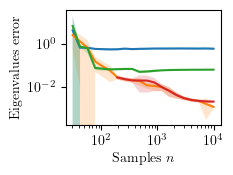

In [5]:
fig, ax = plt.subplots()
leg = []
for name in names:
    err = mean_errors[name].reshape((len(ns), -1))
    ind = np.nanargmin(err, axis=1)
    err = err[np.arange(len(ns)), ind]
    a, = ax.plot(ns, err)
    leg.append(a)
    std = std_errors[name].reshape((len(ns), -1))[np.arange(len(ns)), ind]
    ax.fill_between(ns, err-std, err+std, alpha=0.2)
    # a, = ax.plot(ns, np.log10(best_errors[name]).min(axis=-1))

name = "exponential"
p_i = 2
err = mean_errors[name][:, p_i, :]
ind = np.argmin(err, axis=1)
err = err[np.arange(len(ns)), ind]
a, = ax.plot(ns, err)
leg.append(a)
std = std_errors[name][:, p_i, :][np.arange(len(ns)), ind]
ax.fill_between(ns, err-std, err+std, alpha=0.2)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"Samples $n$")
ax.set_ylabel(r"Eigenvalues error")

fig.savefig(SAVE_DIR / "eigenvalues.pdf", bbox_inches="tight")
# plt.legend()